In [1]:
import pandas as pd

archivo_excel = "../CLN/datos_merged_1986_2023.xlsx"
df = pd.read_excel(archivo_excel)


In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,track_id,track_name,popularity,available_markets,disc_number,duration_ms,explicit,track_number,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,0,0,2A6yzRGMgSQCUapR2ptm6A,True Colors,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,227600,False,4,...,0.0,0.1160,-13.155,1.0,0.0331,171.282,4.0,0.268,1986,3.793333
1,1,1,3gKwVWwKmeuFtPubICbOGc,Paul Revere,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,220840,False,9,...,6.0,0.2280,-13.232,0.0,0.9440,91.753,4.0,0.578,1986,3.680667
2,2,2,2tY1gxCKslfXLFpFofYmJQ,Brass Monkey,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,157440,False,11,...,6.0,0.0992,-8.435,0.0,0.3300,116.371,4.0,0.655,1986,2.624000
3,3,3,31dqpLUModJWNbxrXu6TWd,Shot in the Dark,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,1,256293,False,9,...,6.0,0.1420,-7.262,1.0,0.0324,123.887,3.0,0.619,1986,4.271550
4,4,4,00vYs0qZA40Z8AAaN7xmMO,Manic Monday,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,1,184160,False,1,...,2.0,0.3580,-10.906,1.0,0.0289,121.761,4.0,0.853,1986,3.069333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11450 entries, 0 to 11449
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0.1                11450 non-null  int64         
 1   Unnamed: 0                  11450 non-null  int64         
 2   track_id                    11450 non-null  object        
 3   track_name                  11450 non-null  object        
 4   popularity                  11450 non-null  int64         
 5   available_markets           11449 non-null  object        
 6   disc_number                 11450 non-null  int64         
 7   duration_ms                 11450 non-null  int64         
 8   explicit                    11450 non-null  bool          
 9   track_number                11450 non-null  int64         
 10  href                        11450 non-null  object        
 11  album_id                    11450 non-null  object    

In [7]:
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'track_name', 'popularity',
       'available_markets', 'disc_number', 'duration_ms', 'explicit',
       'track_number', 'href', 'album_id', 'album_name', 'album_release_date',
       'album_type', 'album_total_tracks', 'artists_names', 'artists_ids',
       'principal_artist_id', 'principal_artist_name', 'artist_genres',
       'principal_artist_followers', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'year', 'duration_min'],
      dtype='object')

In [4]:
columnas_a_eliminar = ["Unnamed: 0.1", "Unnamed: 0"]
df = df.drop(columns=columnas_a_eliminar, errors='ignore')

In [7]:
duplicados_totales = df.duplicated().sum()
print("Número total de duplicados ", duplicados_totales)

Número total de duplicados  300


In [9]:
df = df.drop_duplicates(subset=['track_id'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11150 entries, 0 to 11449
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   track_id                    11150 non-null  object        
 1   track_name                  11150 non-null  object        
 2   popularity                  11150 non-null  int64         
 3   available_markets           11149 non-null  object        
 4   disc_number                 11150 non-null  int64         
 5   duration_ms                 11150 non-null  int64         
 6   explicit                    11150 non-null  bool          
 7   track_number                11150 non-null  int64         
 8   href                        11150 non-null  object        
 9   album_id                    11150 non-null  object        
 10  album_name                  11150 non-null  object        
 11  album_release_date          11150 non-null  datetime64[ns]


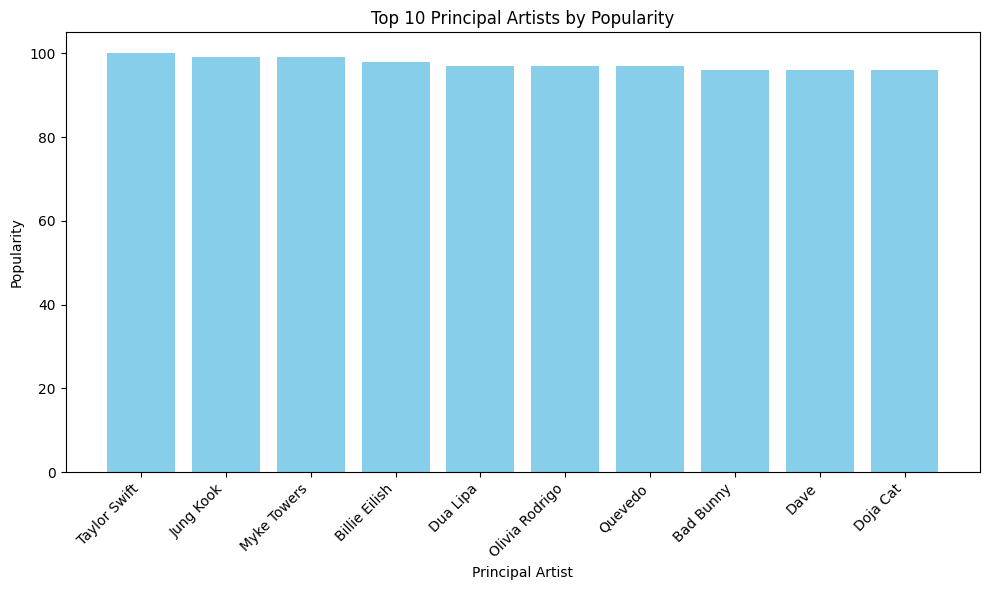

In [12]:
import matplotlib.pyplot as plt

# Ordena el DataFrame por la columna 'popularity' de manera descendente
df_ordenado = df.sort_values(by='popularity', ascending=False)

# Selecciona los primeros 10 registros para la visualización
df_top_10_popularity = df_ordenado.head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_popularity['principal_artist_name'], df_top_10_popularity['popularity'], color='skyblue')
plt.xlabel('Principal Artist')
plt.ylabel('Popularity')
plt.title('Top 10 Principal Artists by Popularity')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()

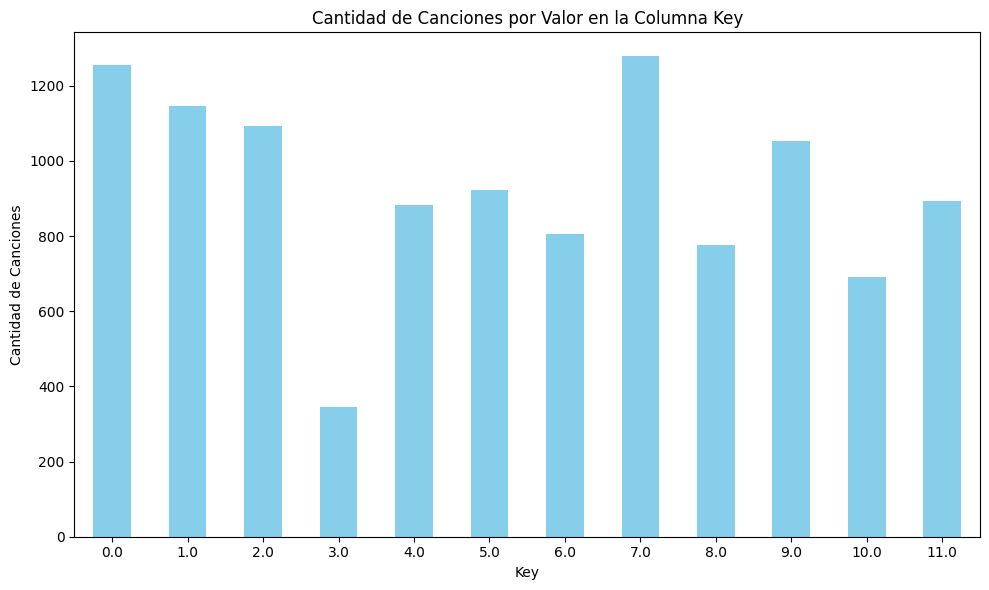

In [13]:
conteo_por_key = df['key'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
conteo_por_key.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Key')
plt.ylabel('Cantidad de Canciones')
plt.title('Cantidad de Canciones por Valor en la Columna Key')
plt.xticks(rotation=0)  # No rotar las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()

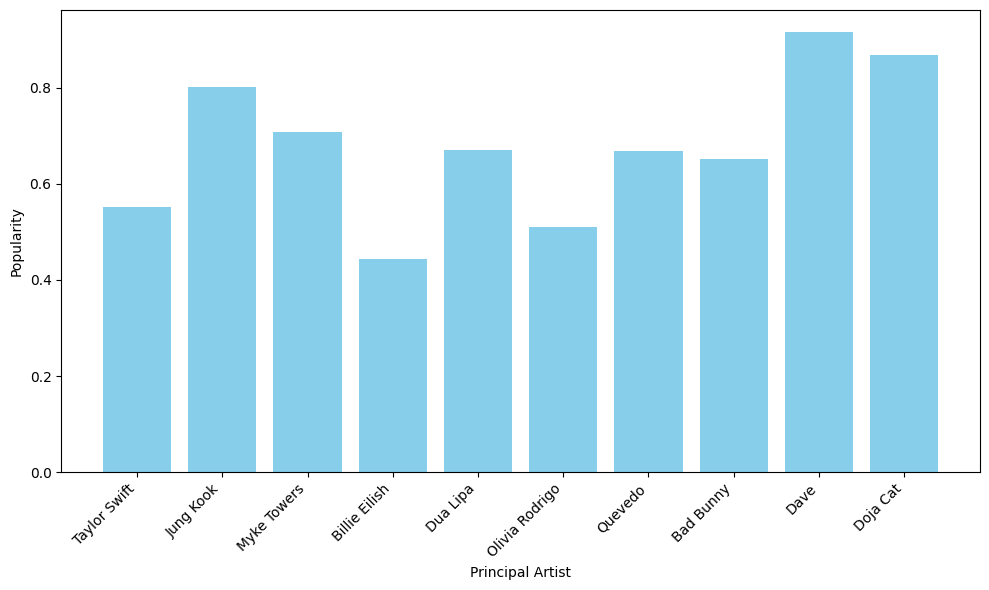

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_popularity['principal_artist_name'], df_top_10_popularity['danceability'], color='skyblue')
plt.xlabel('Principal Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()

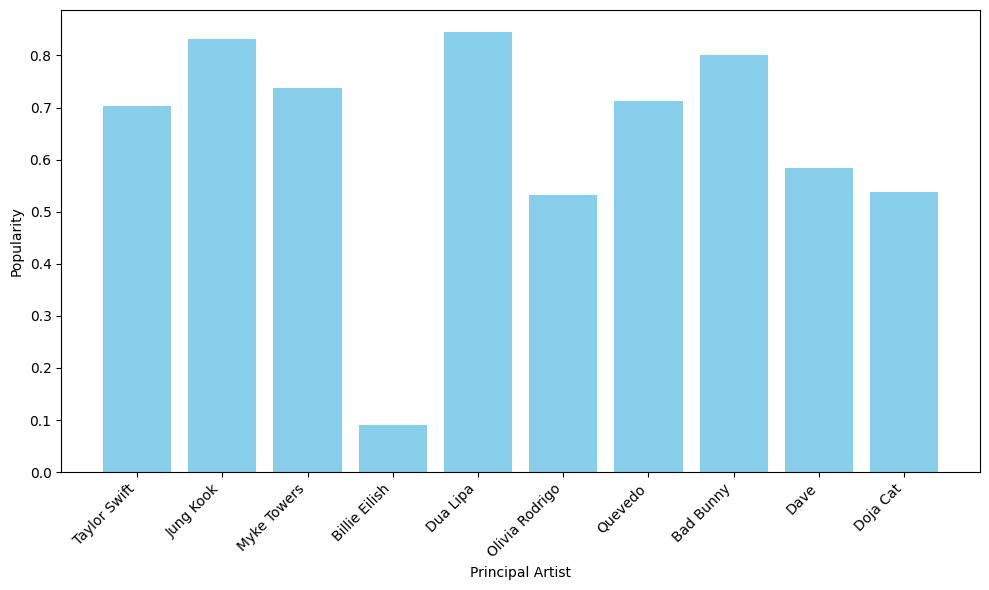

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_popularity['principal_artist_name'], df_top_10_popularity['energy'], color='skyblue')
plt.xlabel('Principal Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()

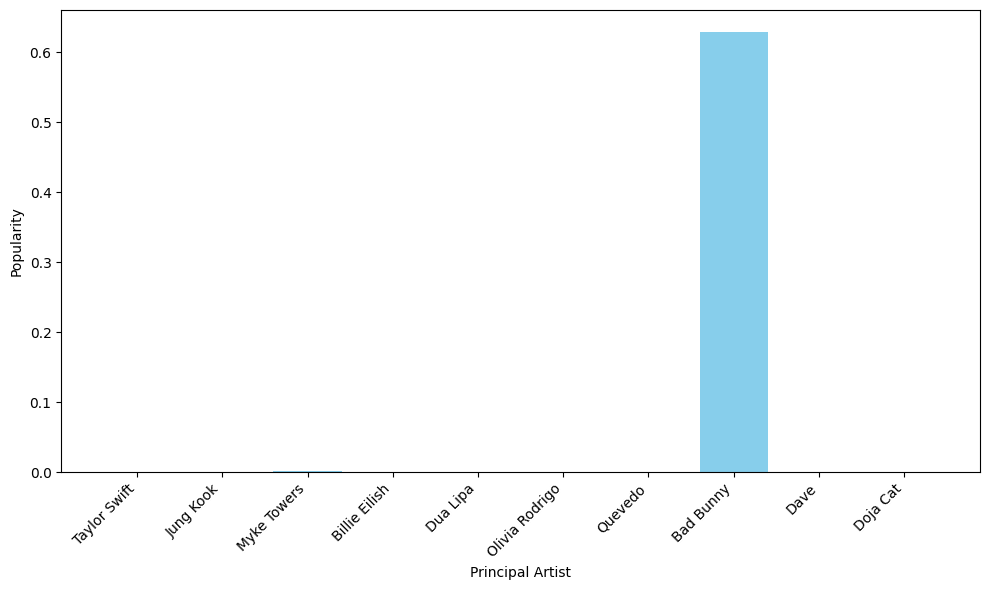

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_popularity['principal_artist_name'], df_top_10_popularity['instrumentalness'], color='skyblue')
plt.xlabel('Principal Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()